In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Visual theme
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")

# Colours (consistent semantics)
COLOR_PRICE = "#d62728"      # red
COLOR_DEMAND = "#1f77b4"     # blue
COLOR_RENEWABLE = "#2ca02c"  # green
COLOR_WEATHER = "#9467bd"    # purple

# Output folder
os.makedirs("outputs/figures", exist_ok=True)

# Load data
df = pd.read_csv("model_features_dataset.csv", parse_dates=["timestamp"])


## Spot Price Distribution (Tail Risk)

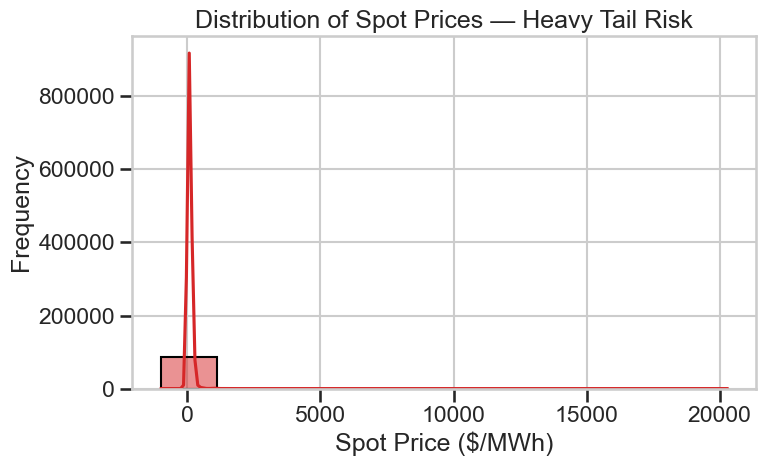

In [2]:
plt.figure(figsize=(8,5))
sns.histplot(df["target_rrp"], bins=10, kde=True, color=COLOR_PRICE)

plt.title("Distribution of Spot Prices — Heavy Tail Risk")
plt.xlabel("Spot Price ($/MWh)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("outputs/figures/02_spot_price_distribution.png", dpi=300)
plt.show()


## Net Demand vs Spot Price

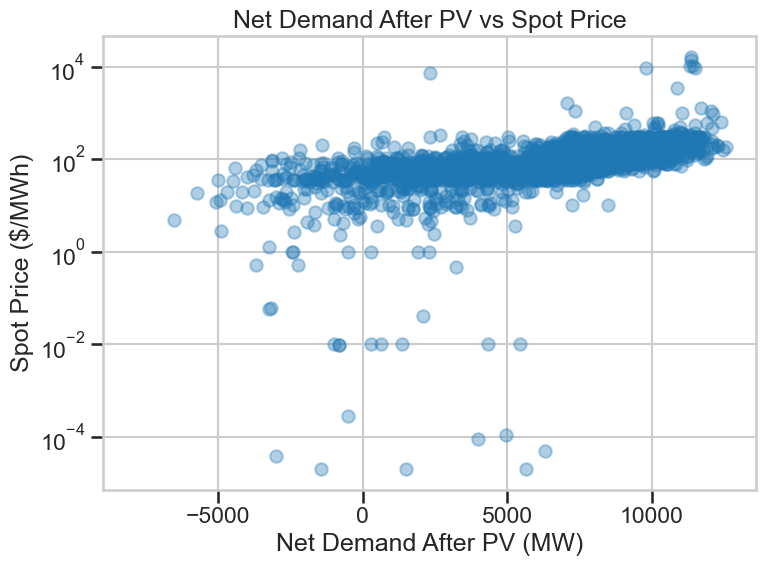

In [3]:
sample = df.sample(4000, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(
    sample["net_demand_after_pv"],
    sample["target_rrp"],
    alpha=0.35,
    color=COLOR_DEMAND
)

plt.title("Net Demand After PV vs Spot Price")
plt.xlabel("Net Demand After PV (MW)")
plt.ylabel("Spot Price ($/MWh)")
plt.yscale("log")

plt.tight_layout()
plt.savefig("outputs/figures/03_net_demand_vs_price.png", dpi=300)
plt.show()


## Average Spot Price by Hour (Time-of-Day Risk)

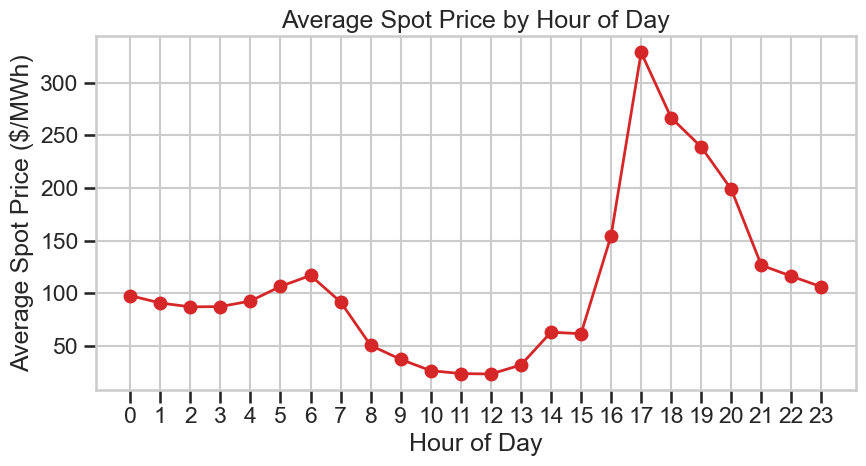

In [4]:
hourly_price = df.groupby("hour")["target_rrp"].mean()

plt.figure(figsize=(9,5))
plt.plot(hourly_price.index, hourly_price.values,
         marker="o", linewidth=2, color=COLOR_PRICE)

plt.title("Average Spot Price by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Spot Price ($/MWh)")

plt.xticks(range(0,24))
plt.tight_layout()
plt.savefig("outputs/figures/04_price_by_hour.png", dpi=300)
plt.show()


## Solar PV Impact on Net Demand (Shaping Effect)

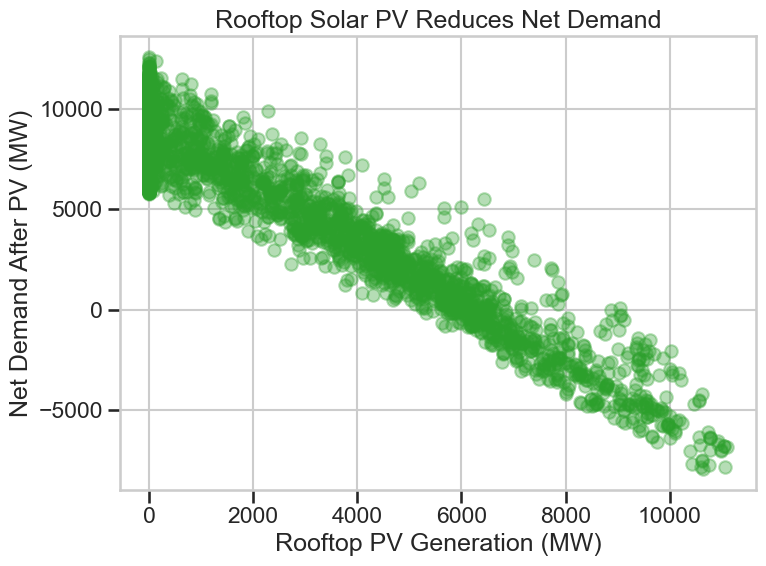

In [5]:
sample = df.sample(4000, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(
    sample["pv_rooftop_mw"],
    sample["net_demand_after_pv"],
    alpha=0.35,
    color=COLOR_RENEWABLE
)

plt.title("Rooftop Solar PV Reduces Net Demand")
plt.xlabel("Rooftop PV Generation (MW)")
plt.ylabel("Net Demand After PV (MW)")

plt.tight_layout()
plt.savefig("outputs/figures/05_pv_vs_net_demand.png", dpi=300)
plt.show()


## Intermittent Generation vs Spot Price

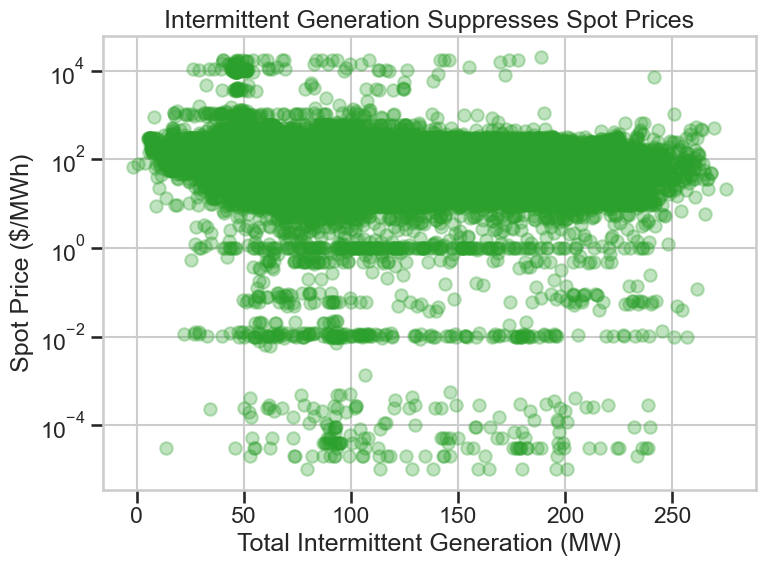

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["TOTALINTERMITTENTGENERATION"],
    df["target_rrp"],
    alpha=0.3,
    color=COLOR_RENEWABLE
)

plt.title("Intermittent Generation Suppresses Spot Prices")
plt.xlabel("Total Intermittent Generation (MW)")
plt.ylabel("Spot Price ($/MWh)")
plt.yscale("log")

plt.tight_layout()
plt.savefig("outputs/figures/06_renewables_vs_price.png", dpi=300)
plt.show()


## Temperature vs Total Demand (Weather-Driven Load)

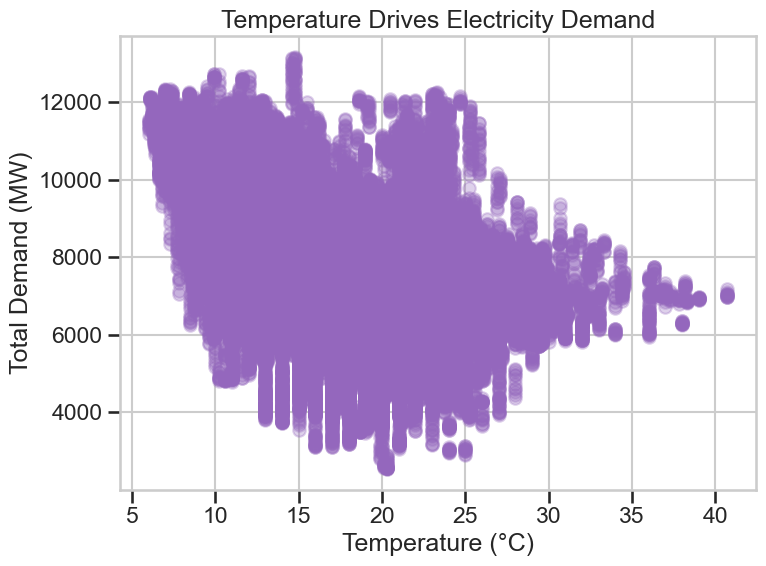

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["temperature"],
    df["TOTALDEMAND"],
    alpha=0.3,
    color=COLOR_WEATHER
)

plt.title("Temperature Drives Electricity Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total Demand (MW)")

plt.tight_layout()
plt.savefig("outputs/figures/07_temperature_vs_demand.png", dpi=300)
plt.show()


## Demand Ramp vs Price (Stress Events)

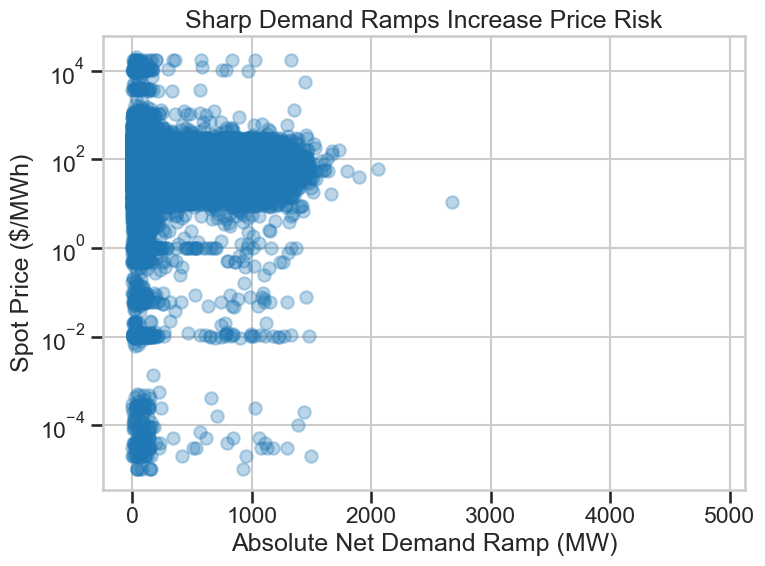

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["abs_net_demand_ramp"],
    df["target_rrp"],
    alpha=0.3,
    color=COLOR_DEMAND
)

plt.title("Sharp Demand Ramps Increase Price Risk")
plt.xlabel("Absolute Net Demand Ramp (MW)")
plt.ylabel("Spot Price ($/MWh)")
plt.yscale("log")

plt.tight_layout()
plt.savefig("outputs/figures/08_demand_ramp_vs_price.png", dpi=300)
plt.show()



## Renewable Ramp vs Spot Price Volatility

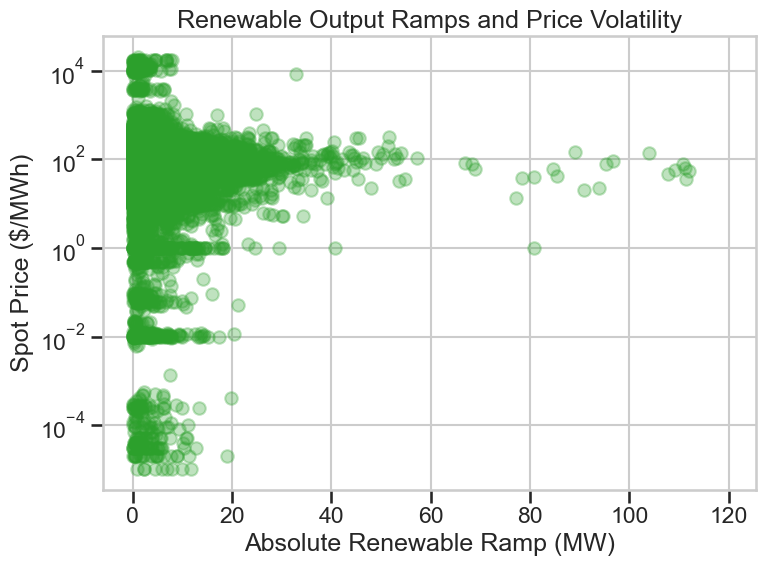

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["abs_renewable_ramp"],
    df["target_rrp"],
    alpha=0.3,
    color=COLOR_RENEWABLE
)

plt.title("Renewable Output Ramps and Price Volatility")
plt.xlabel("Absolute Renewable Ramp (MW)")
plt.ylabel("Spot Price ($/MWh)")
plt.yscale("log")

plt.tight_layout()
plt.savefig("outputs/figures/09_renewable_ramp_vs_price.png", dpi=300)
plt.show()


## Average Daily Net Demand Profile

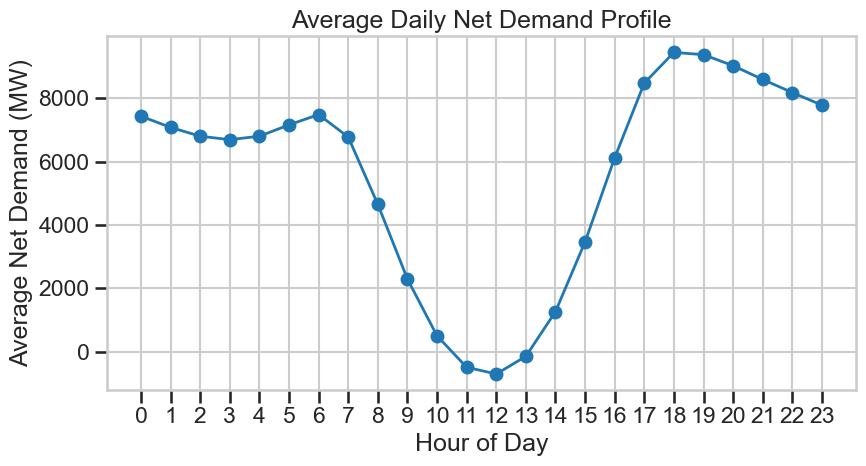

In [10]:
hourly_net_demand = df.groupby("hour")["net_demand_after_pv"].mean()

plt.figure(figsize=(9,5))
plt.plot(
    hourly_net_demand.index,
    hourly_net_demand.values,
    marker="o",
    linewidth=2,
    color=COLOR_DEMAND
)

plt.title("Average Daily Net Demand Profile")
plt.xlabel("Hour of Day")
plt.ylabel("Average Net Demand (MW)")
plt.xticks(range(0,24))

plt.tight_layout()
plt.savefig("outputs/figures/10_net_demand_daily_profile.png", dpi=300)
plt.show()


# Forcasting

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Visual theme
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")

# Colours (consistent semantics)
COLOR_PRICE = "#d62728"      # red
COLOR_DEMAND = "#1f77b4"     # blue
COLOR_RENEWABLE = "#2ca02c"  # green
COLOR_WEATHER = "#9467bd"    # purple

# Output folder
os.makedirs("outputs/figures", exist_ok=True)


# Load data
df_forcast = pd.read_csv("powerbi_dataset_5min.csv", parse_dates=["timestamp"])


## Historical vs Forecasted Price (MOST IMPORTANT)

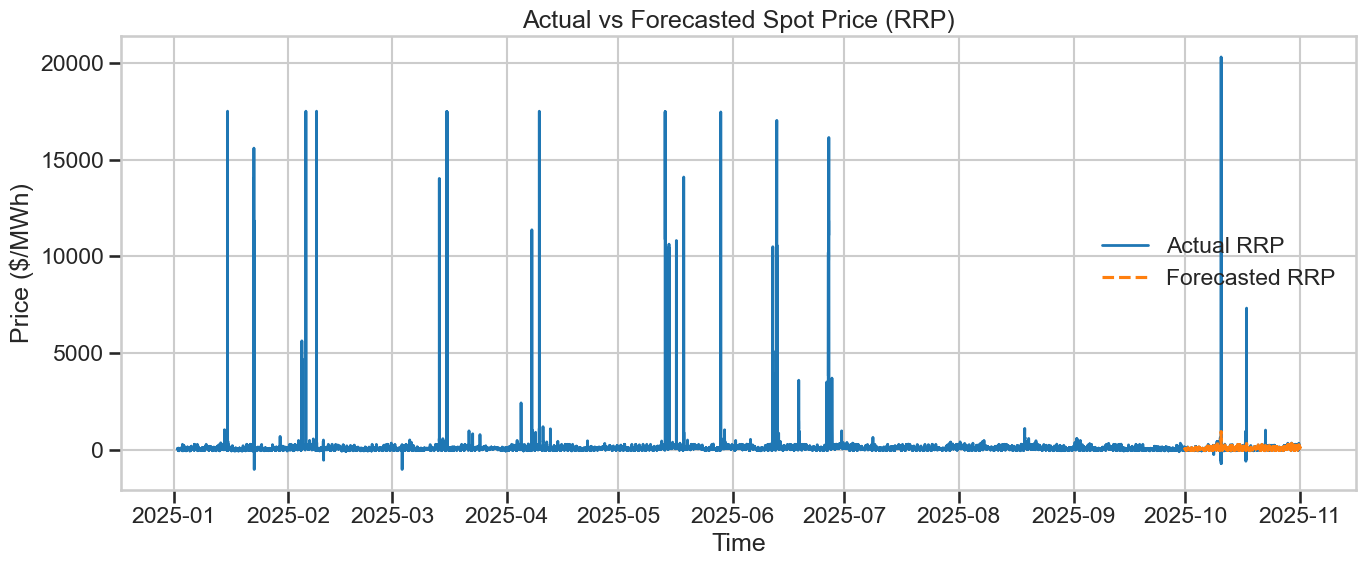

In [12]:
plt.figure(figsize=(14,6))
plt.plot(df_forcast["timestamp"], df_forcast["target_rrp"], label="Actual RRP", linewidth=2)
plt.plot(df_forcast["timestamp"], df_forcast["predicted_rrp"], label="Forecasted RRP", linestyle="--")

plt.title("Actual vs Forecasted Spot Price (RRP)")
plt.xlabel("Time")
plt.ylabel("Price ($/MWh)")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/forecast_visuals/01_actual_vs_forecast_rrp.png")
plt.show()


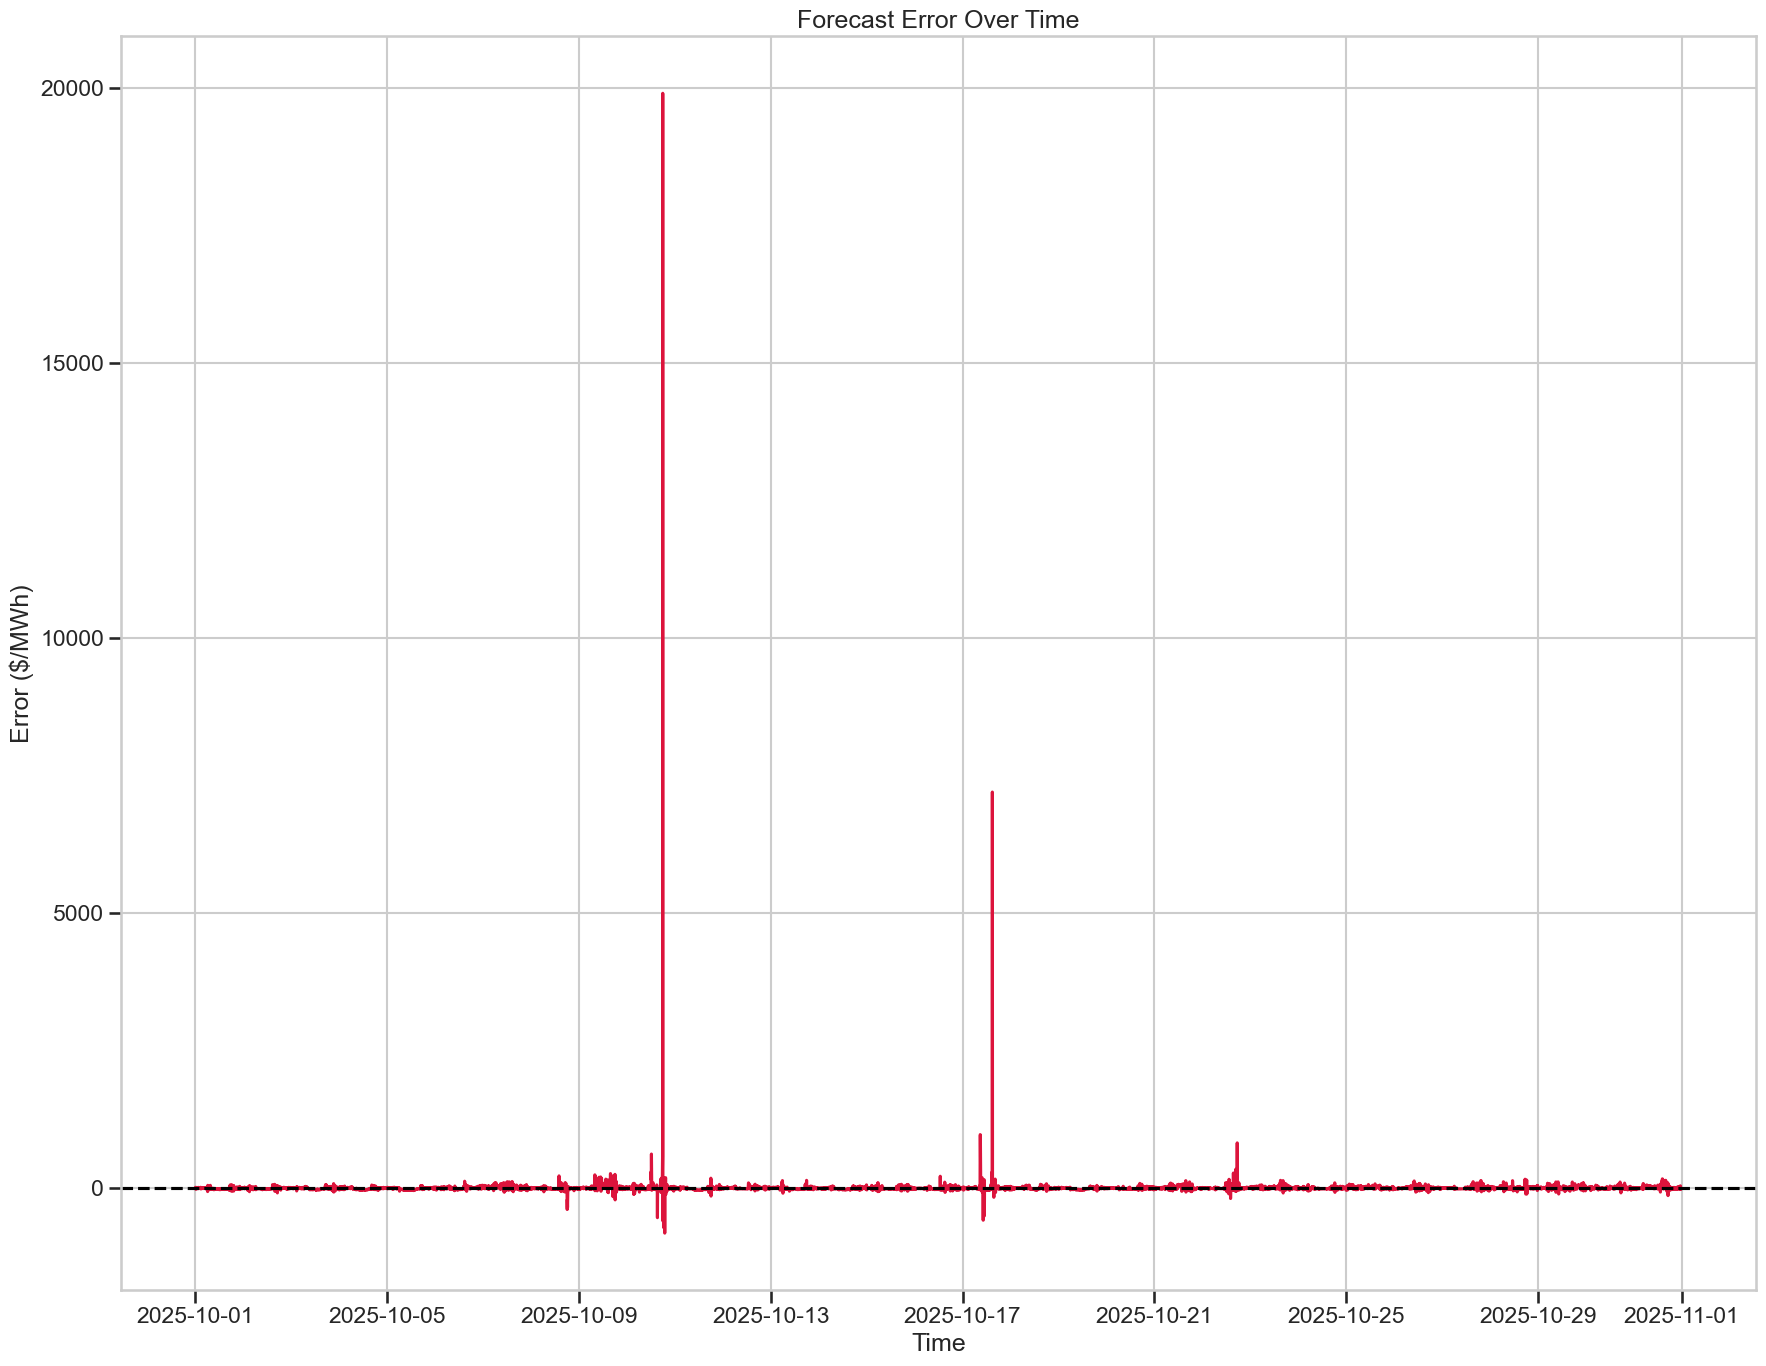

In [13]:
df_forcast["forecast_error"] = df_forcast["target_rrp"] - df_forcast["predicted_rrp"]

plt.figure(figsize=(18,14))
plt.plot(df_forcast["timestamp"], df_forcast["forecast_error"], color="crimson")
plt.axhline(0, linestyle="--", color="black")

plt.title("Forecast Error Over Time")
plt.xlabel("Time")
plt.ylabel("Error ($/MWh)")
plt.tight_layout()
plt.savefig("outputs/forecast_visuals/02_forecast_error_over_time.png")
plt.show()


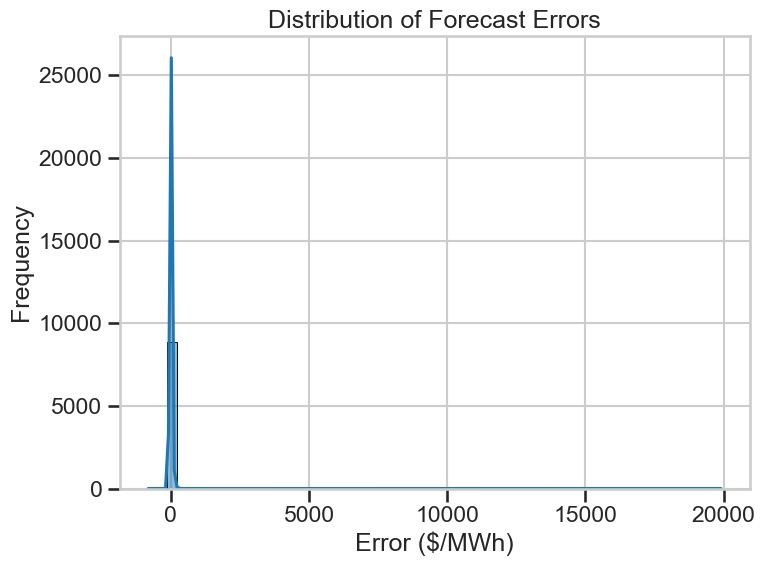

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df_forcast["forecast_error"], bins=60, kde=True)

plt.title("Distribution of Forecast Errors")
plt.xlabel("Error ($/MWh)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("outputs/forecast_visuals/03_error_distribution.png")
plt.show()


## Lag Feature Correlation (Model Memory Check)

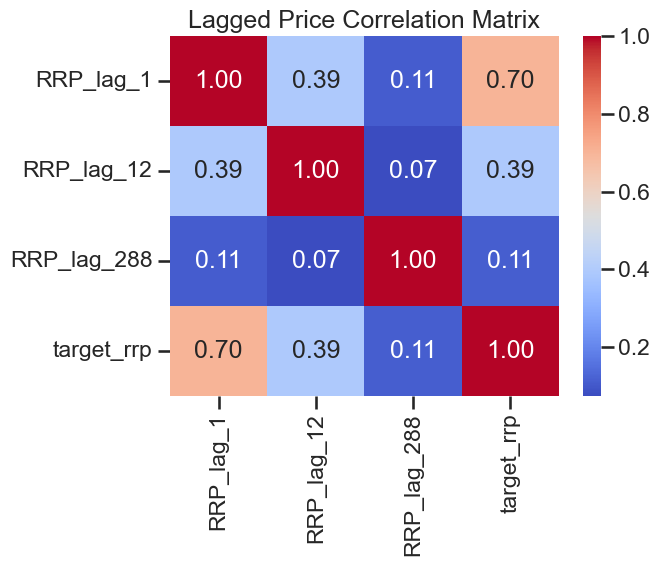

In [15]:
lags = df_forcast[["RRP_lag_1", "RRP_lag_12", "RRP_lag_288", "target_rrp"]]

plt.figure(figsize=(7,6))
sns.heatmap(lags.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Lagged Price Correlation Matrix")
plt.tight_layout()
plt.savefig("outputs/forecast_visuals/07_lag_correlation.png")
plt.show()


## Hourly Price Shape (Intraday Pattern)

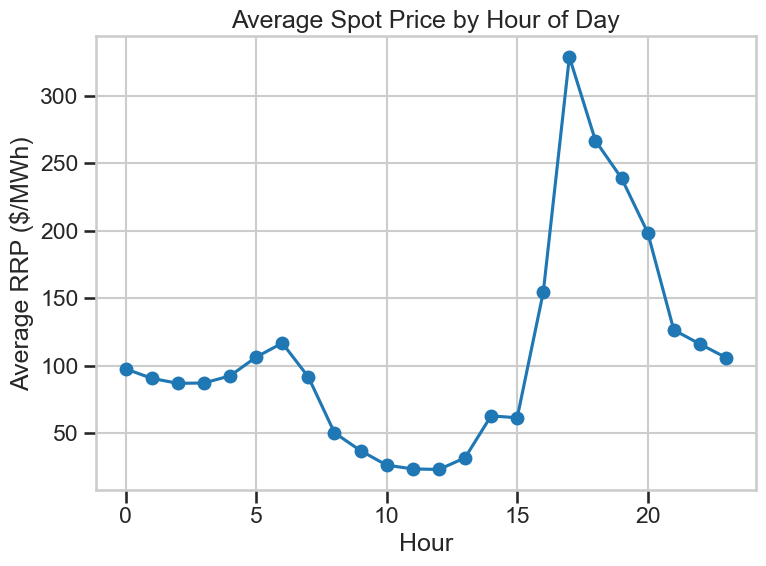

In [16]:
hourly_price = df.groupby("hour")["target_rrp"].mean()

plt.figure(figsize=(8,6))
hourly_price.plot(marker="o")

plt.title("Average Spot Price by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average RRP ($/MWh)")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/forecast_visuals/08_hourly_price_shape.png")
plt.show()


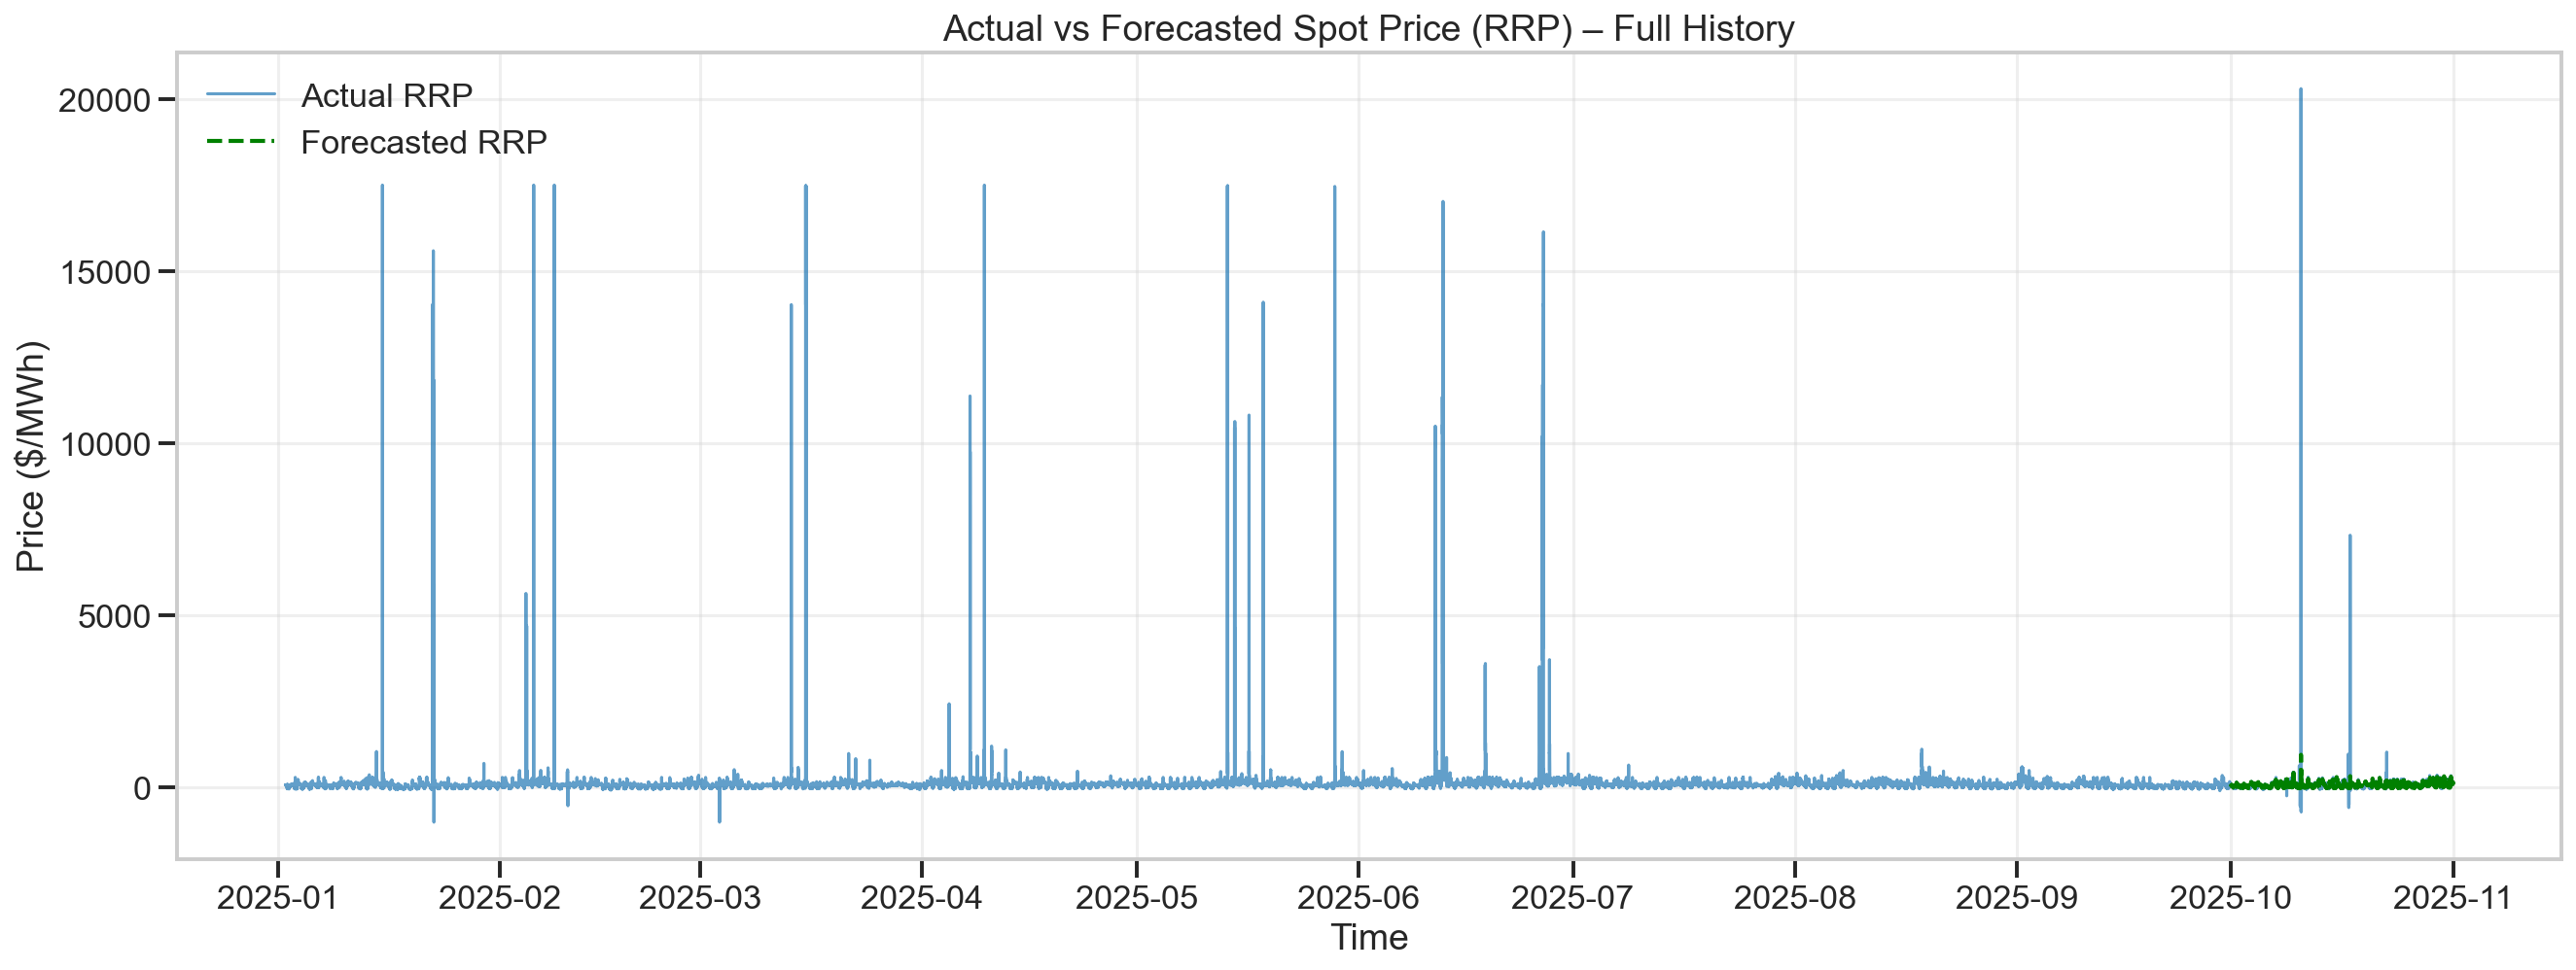

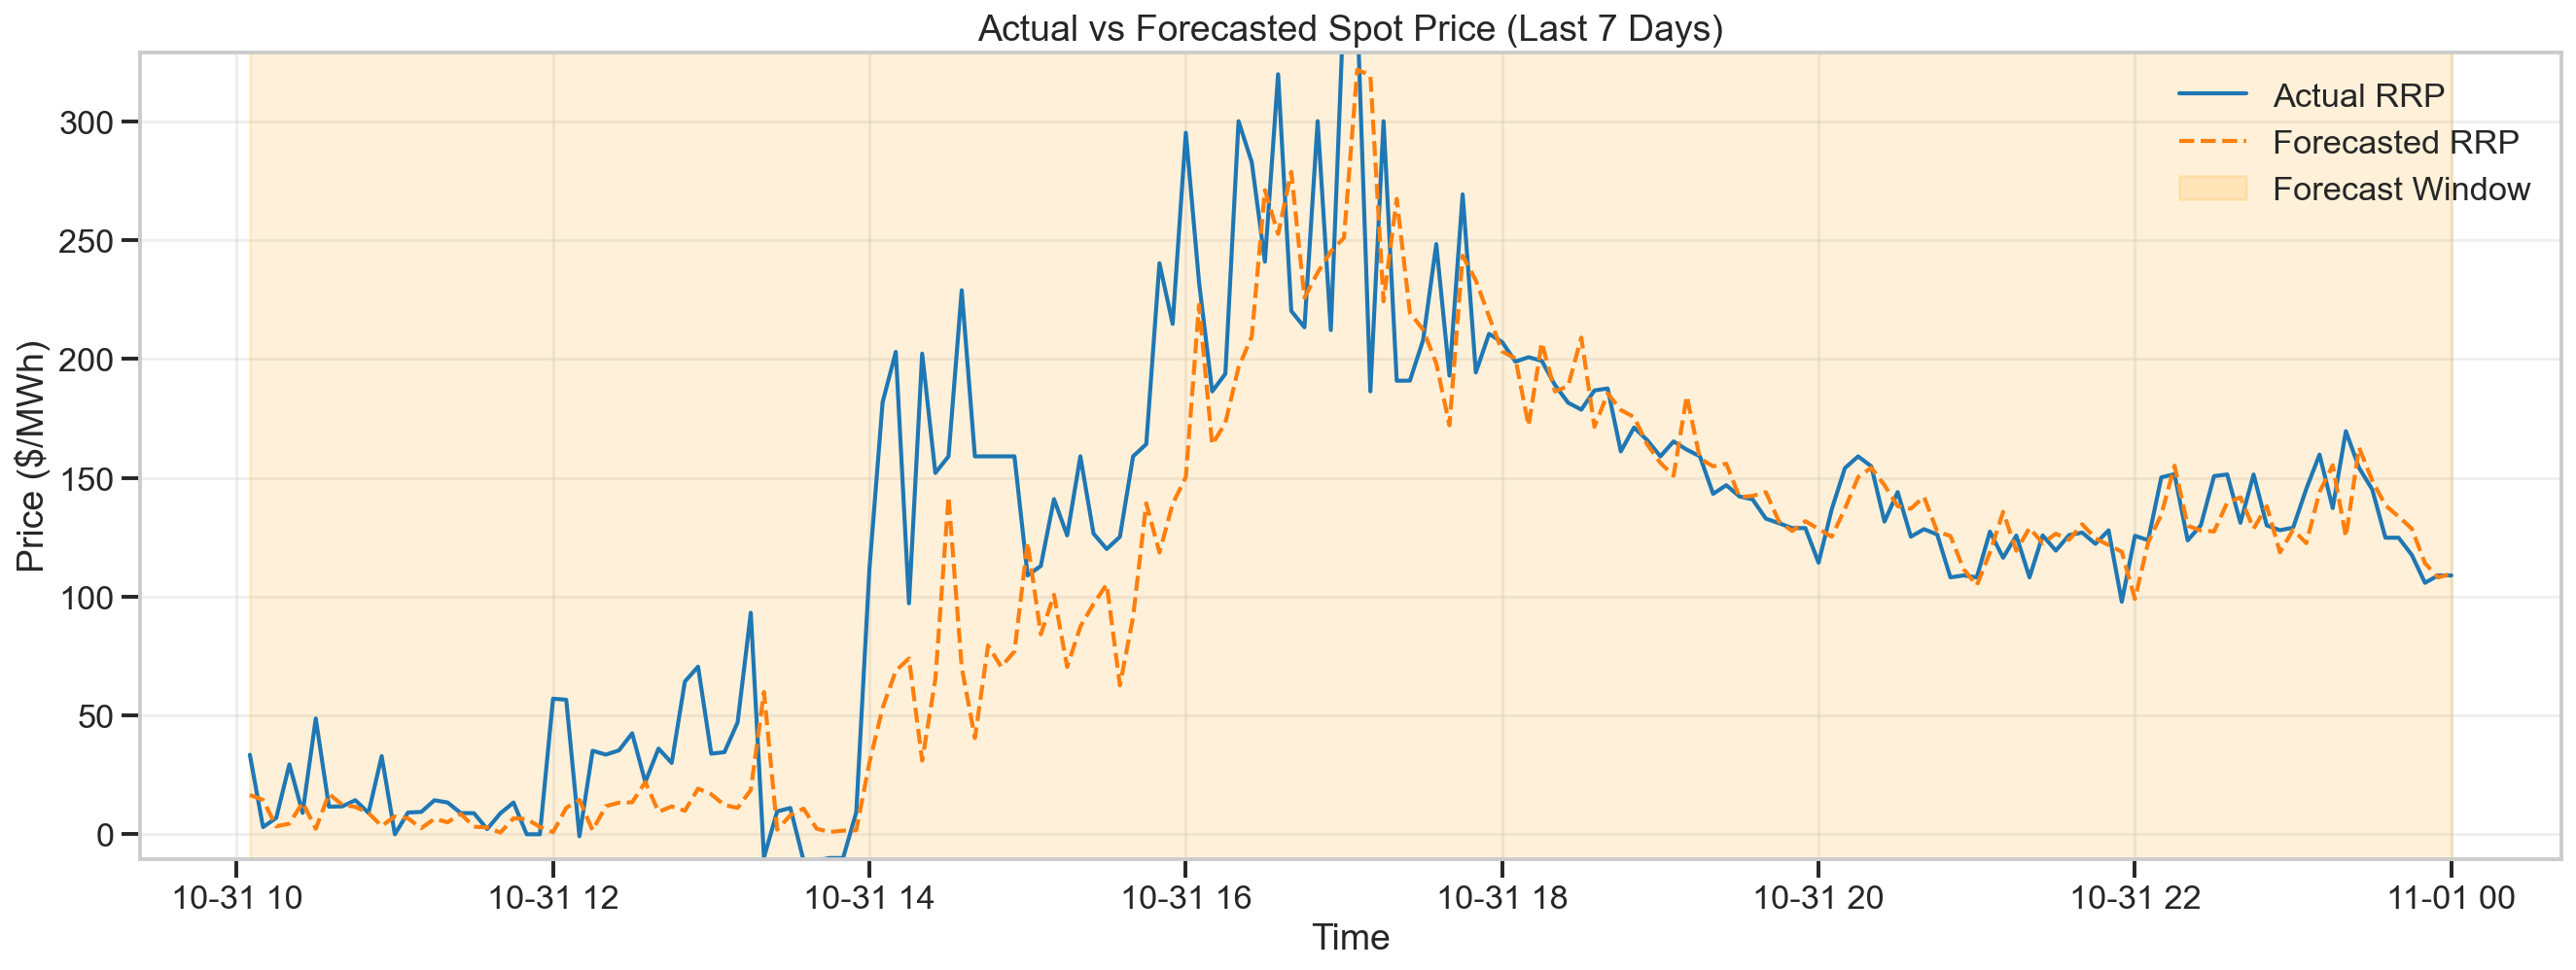

In [17]:
import matplotlib.pyplot as plt

# -----------------------------
# CONFIGURATION
# -----------------------------
forecast_days = 7                # Change to 3, 5, 14 if needed
freq_per_day = 24                # Hourly data
forecast_window = forecast_days * freq_per_day

output_path = "outputs/forecast_visuals/"

# -----------------------------
# 1️⃣ FULL HISTORY (Context Plot)
# -----------------------------
plt.figure(figsize=(18, 7), dpi=150)

plt.plot(
    df_forcast["timestamp"],
    df_forcast["target_rrp"],
    label="Actual RRP",
    linewidth=1.5,
    alpha=0.7
)

plt.plot(
    df_forcast["timestamp"],
    df_forcast["predicted_rrp"],
    label="Forecasted RRP",
    linestyle="--",
    linewidth=2,
    color="green"
)

plt.title("Actual vs Forecasted Spot Price (RRP) – Full History")
plt.xlabel("Time")
plt.ylabel("Price ($/MWh)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(
    f"{output_path}01_rrp_full_history.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# -----------------------------
# 2️⃣ ZOOMED FORECAST WINDOW (KEY VISUAL)
# -----------------------------
plt.figure(figsize=(18, 7), dpi=150)

# Zoomed data
timestamps_zoom = df_forcast["timestamp"].iloc[-forecast_window:]
actual_zoom = df_forcast["target_rrp"].iloc[-forecast_window:]
forecast_zoom = df_forcast["predicted_rrp"].iloc[-forecast_window:]

plt.plot(
    timestamps_zoom,
    actual_zoom,
    label="Actual RRP",
    linewidth=2
)

plt.plot(
    timestamps_zoom,
    forecast_zoom,
    label="Forecasted RRP",
    linestyle="--",
    linewidth=2
)

# Highlight forecast region
plt.axvspan(
    timestamps_zoom.iloc[0],
    timestamps_zoom.iloc[-1],
    color="orange",
    alpha=0.15,
    label="Forecast Window"
)

# Visual spike control (do NOT change data)
lower = actual_zoom.quantile(0.01)
upper = actual_zoom.quantile(0.99)
plt.ylim(lower, upper)

plt.title(f"Actual vs Forecasted Spot Price (Last {forecast_days} Days)")
plt.xlabel("Time")
plt.ylabel("Price ($/MWh)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(
    f"{output_path}02_rrp_last_{forecast_days}_days.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


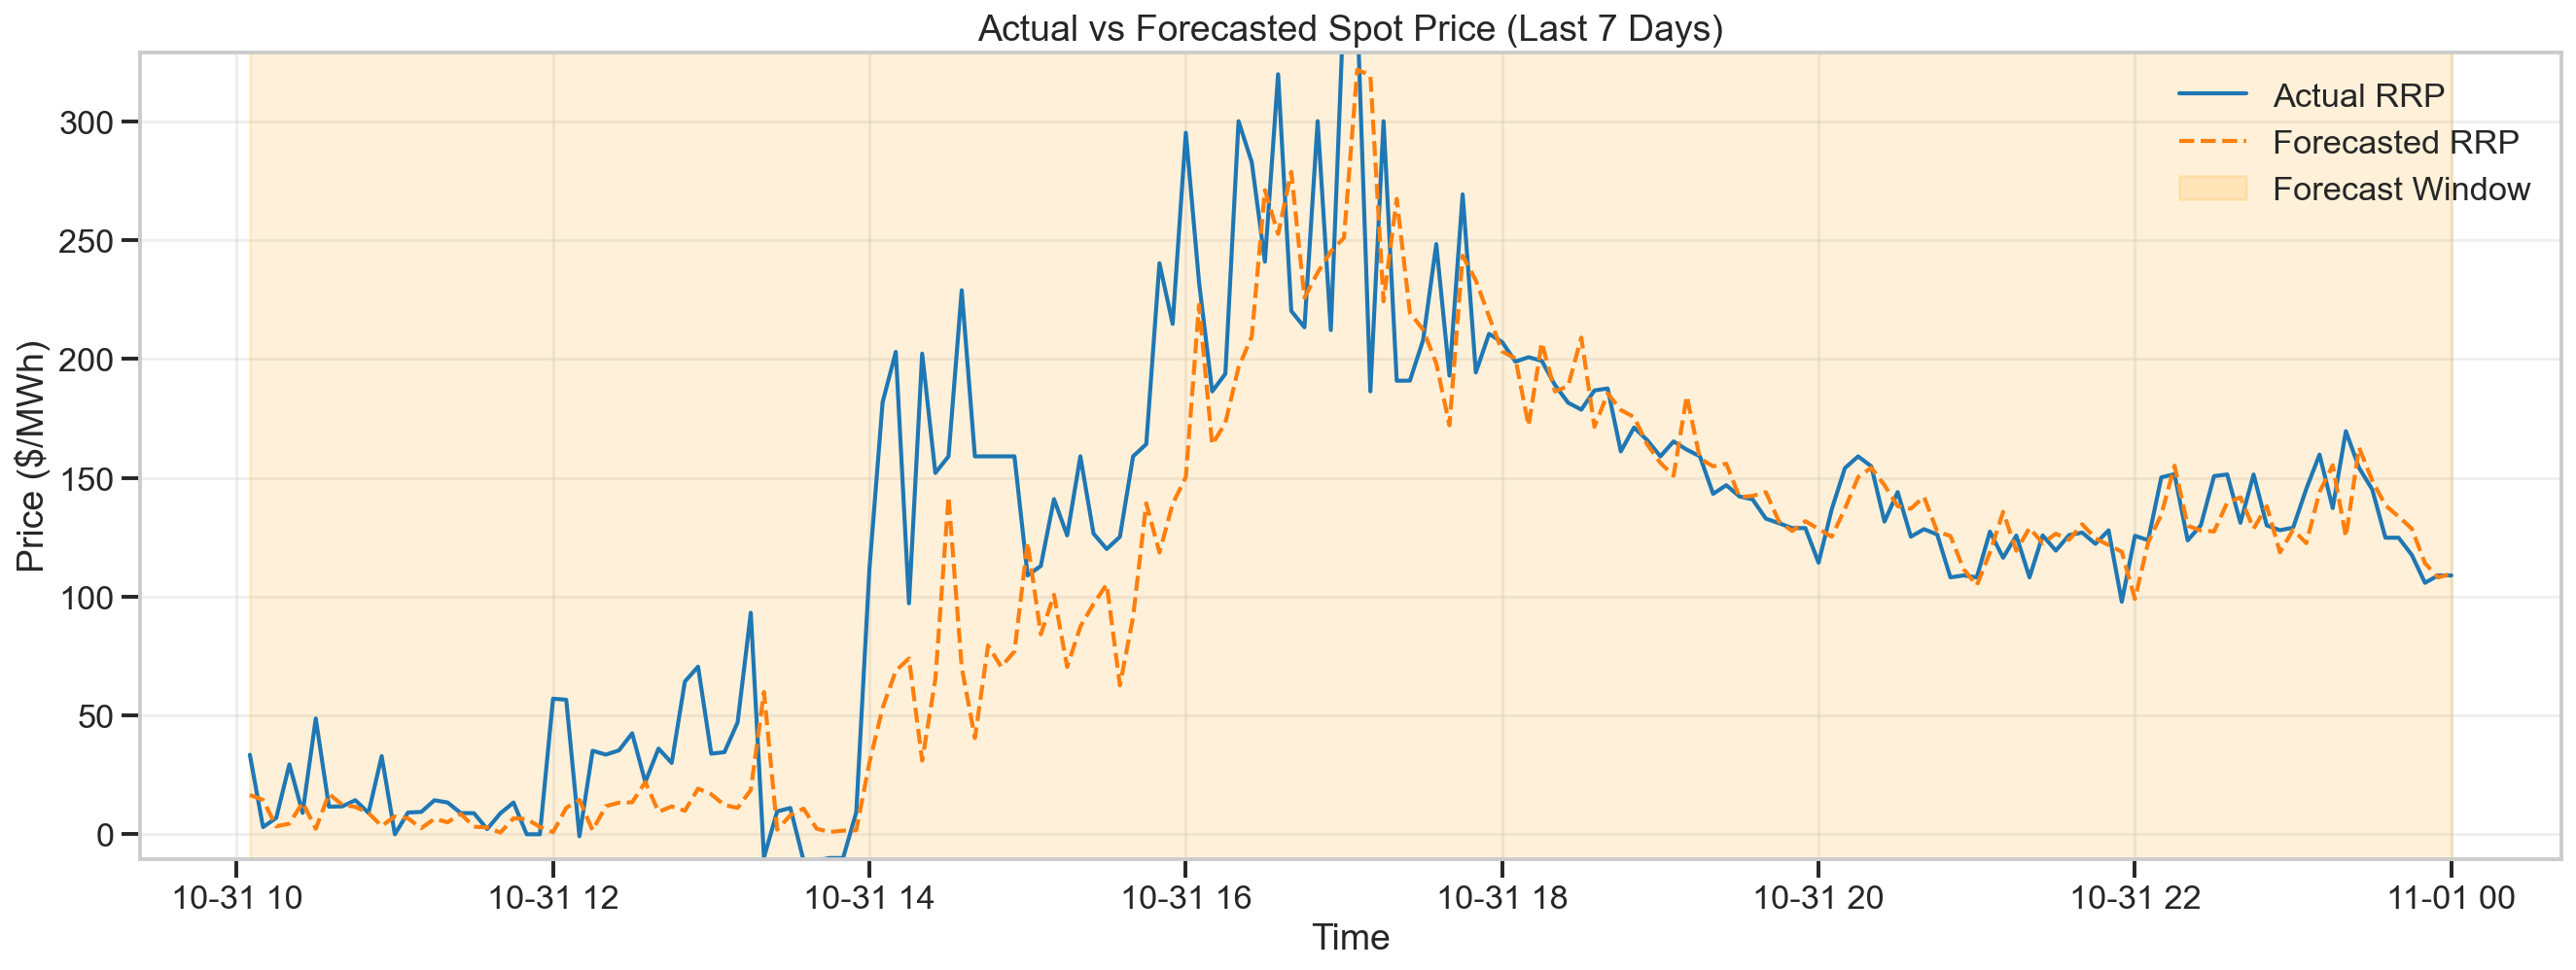

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

# -----------------------------
# CONFIG
# -----------------------------
forecast_days = 7
freq_per_day = 24
forecast_window = forecast_days * freq_per_day

# -----------------------------
# ZOOMED FORECAST PLOT
# -----------------------------
plt.figure(figsize=(18, 7), dpi=150)

timestamps = df_forcast["timestamp"].iloc[-forecast_window:]
actual = df_forcast["target_rrp"].iloc[-forecast_window:]
forecast = df_forcast["predicted_rrp"].iloc[-forecast_window:]

plt.plot(
    timestamps,
    actual,
    label="Actual RRP",
    linewidth=2
)

plt.plot(
    timestamps,
    forecast,
    label="Forecasted RRP",
    linestyle="--",
    linewidth=2
)

# Highlight forecast window
plt.axvspan(
    timestamps.iloc[0],
    timestamps.iloc[-1],
    color="orange",
    alpha=0.15,
    label="Forecast Window"
)

# Visual spike control (visual only)
lower = actual.quantile(0.01)
upper = actual.quantile(0.99)
plt.ylim(lower, upper)

plt.title("Actual vs Forecasted Spot Price (Last 7 Days)")
plt.xlabel("Time")
plt.ylabel("Price ($/MWh)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
plt.savefig("outputs/forecast_visuals/Final_forcast_Nov.png")

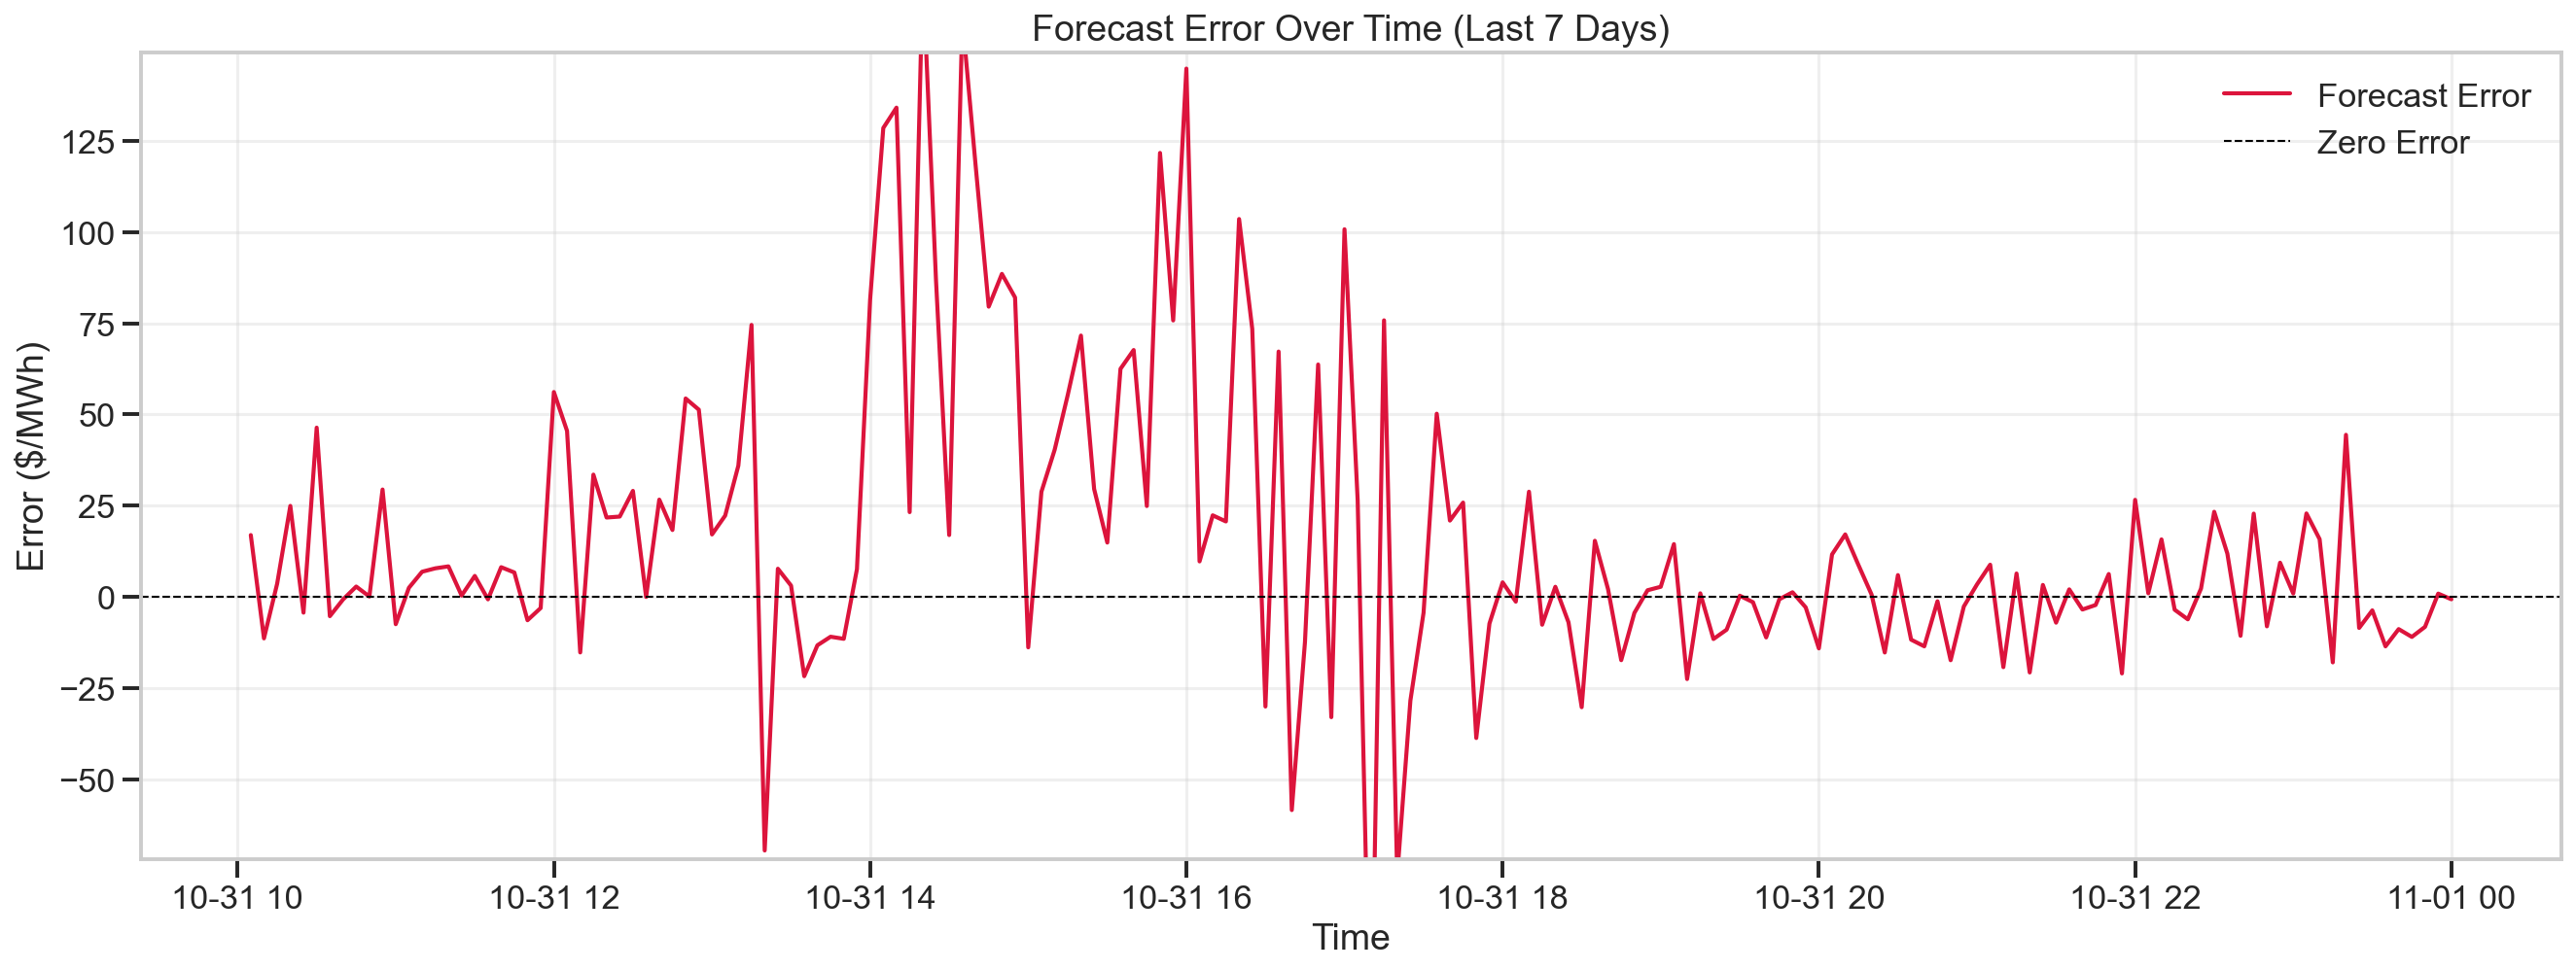

In [21]:
import matplotlib.pyplot as plt

# -----------------------------
# FORECAST ERROR CALCULATION
# -----------------------------
df_forcast["forecast_error"] = (
    df_forcast["target_rrp"] - df_forcast["predicted_rrp"]
)

# -----------------------------
# CONFIG
# -----------------------------
forecast_days = 7
freq_per_day = 24
forecast_window = forecast_days * freq_per_day

# -----------------------------
# ZOOMED FORECAST ERROR PLOT
# -----------------------------
plt.figure(figsize=(18, 7), dpi=150)

timestamps = df_forcast["timestamp"].iloc[-forecast_window:]
errors = df_forcast["forecast_error"].iloc[-forecast_window:]

plt.plot(
    timestamps,
    errors,
    color="crimson",
    linewidth=2,
    label="Forecast Error"
)

plt.axhline(
    0,
    linestyle="--",
    color="black",
    linewidth=1,
    label="Zero Error"
)

# Visual spike control (visual only)
lower = errors.quantile(0.01)
upper = errors.quantile(0.99)
plt.ylim(lower, upper)

plt.title("Forecast Error Over Time (Last 7 Days)")
plt.xlabel("Time")
plt.ylabel("Error ($/MWh)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(
    "outputs/forecast_visuals/03_forecast_error_last_7_dyas_1.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
